In [24]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [3]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [4]:
X=df[['calory','breakfast','lunch','dinner','exercise']]

In [5]:
y=df[['body_shape']]

In [6]:
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [7]:
y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
x_std=scaler.fit_transform(X)


In [12]:
features=x_std.T

In [13]:
features

array([[-1.35205803,  0.01711466,  0.61612771, -1.18091145,  1.89972711,
        -1.26648474,  0.18826125,  1.04399418, -0.15403193,  0.18826125],
       [ 0.        ,  0.        ,  1.29099445, -1.29099445,  1.29099445,
        -1.29099445,  0.        ,  1.29099445, -1.29099445,  0.        ],
       [-1.3764944 , -0.22941573,  0.91766294, -0.22941573,  0.91766294,
        -1.3764944 , -1.3764944 ,  0.91766294,  0.91766294,  0.91766294],
       [-1.28571429,  0.14285714,  0.14285714, -1.28571429,  1.57142857,
         0.14285714,  0.14285714,  1.57142857, -1.28571429,  0.14285714],
       [ 1.        ,  0.        , -1.        ,  2.        , -1.        ,
         1.        ,  0.        , -1.        , -1.        ,  0.        ]])

In [14]:
cov_mat=np.cov(features)

In [15]:
cov_mat

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

# get eigen value and eigen vectors from covariance matrix 

In [16]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)

In [17]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [18]:
eig_vecs

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [20]:
max_index=np.argmax(eig_vals)

In [21]:
projected_x=np.matmul(x_std,eig_vecs.T[max_index])

In [23]:
projected_x

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [26]:
result=pd.DataFrame(projected_x,columns=['pca1'])

In [28]:
result['y-axis']=0.0
result['labels']=y

In [29]:
result

,pca1,y-axis,labels
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


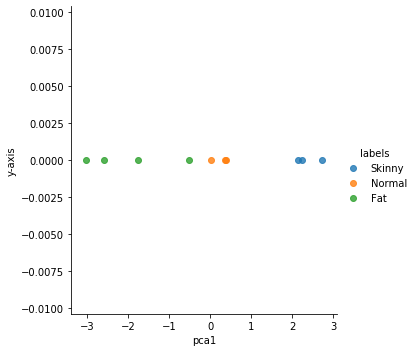

In [31]:
sns.lmplot('pca1','y-axis',data=result,fit_reg=False,hue='labels')

In [32]:
#https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca/PCA.ipynb
#the SITE AND CODE where i learned the PCA and Used data